<a href="https://colab.research.google.com/github/PavankumarUppar/MNIST-Classification-using-ANN/blob/main/MINIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [ ]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1:] == (28,28))
assert(X_test.shape[1:] == (28,28))

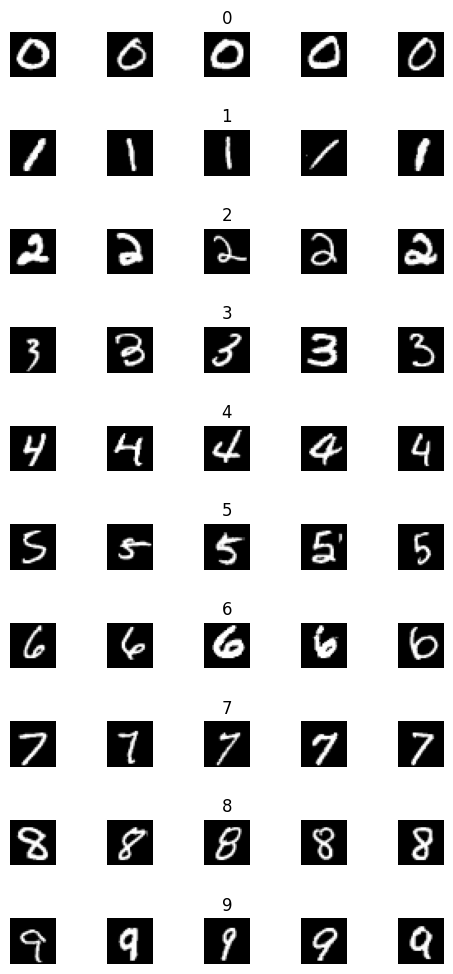

In [ ]:
num_of_samples = []

cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

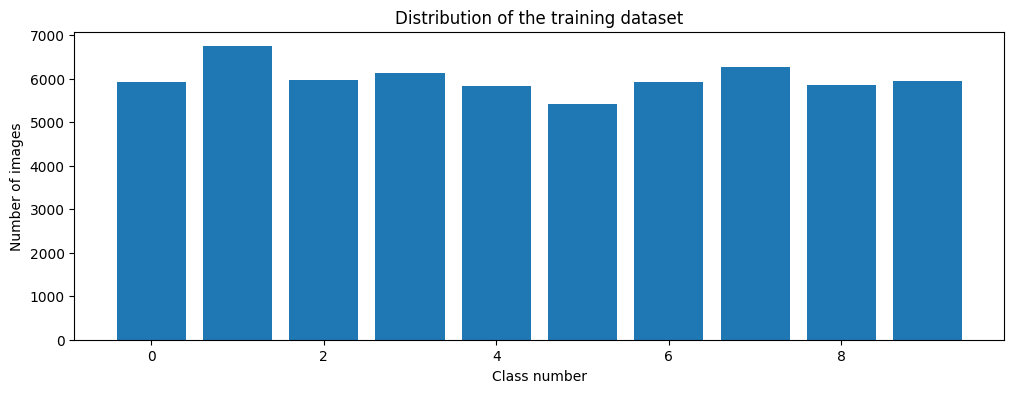

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 4s 12ms/step - loss: 0.4772 - accuracy: 0.8523 - val_loss: 0.2268 - val_accuracy: 0.9345
Epoch 2/10
270/270 [==============================] - 3s 10ms/step - loss: 0.2657 - accuracy: 0.9224 - val_loss: 0.2098 - val_accuracy: 0.9390
Epoch 3/10
270/270 [==============================] - 2s 9ms/step - loss: 0.2278 - accuracy: 0.9325 - val_loss: 0.1857 - val_accuracy: 0.9443
Epoch 4/10
270/270 [==============================] - 2s 7ms/step - loss: 0.2116 - accuracy: 0.9363 - val_loss: 0.1969 - val_accuracy: 0.9432
Epoch 5/10
270/270 [==============================] - 2s 7ms/step - loss: 0.1993 - accuracy: 0.9408 - val_loss: 0.1943 - val_accuracy: 0.9458
Epoch 6/10
270/270 [==============================] - 2s 8ms/step - loss: 0.1879 - accuracy: 0.9434 - val_loss: 0.1684 - val_accuracy: 0.9515
Epoch 7/10
270/270 [==============================] - 2s 7ms/step - loss: 0.1833 - accuracy: 0.9451 - val_loss: 0.1671 - val_accuracy: 0.9513
Epoc

Text(0.5, 0, 'epoch')

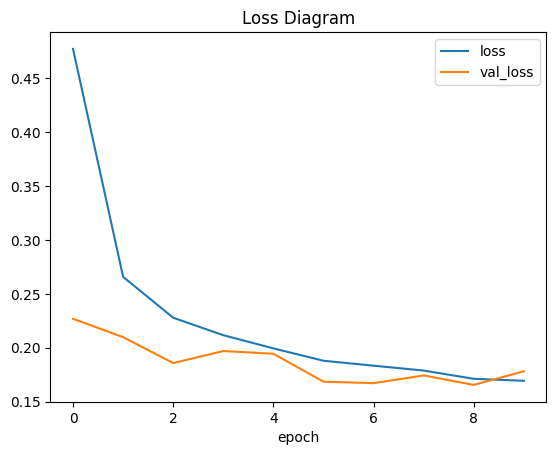

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss Diagram')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

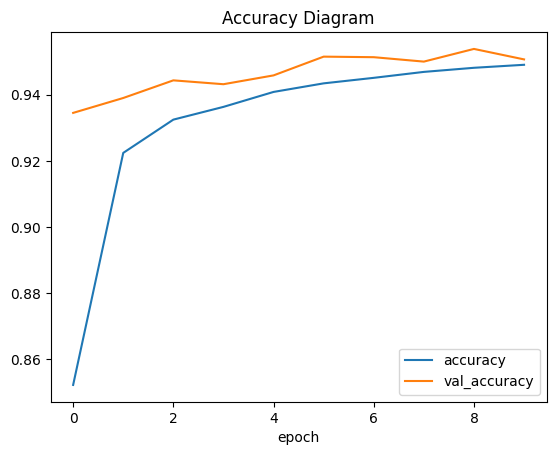

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy Diagram')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Rest Score:', score[0])
print('Test Accuracy:', score[1])

<class 'list'>
Rest Score: 0.20967617630958557
Test Accuracy: 0.9398999810218811
